In [30]:
# =========================
# 1. Import libraries
# =========================
# We use pandas for data handling, seaborn & matplotlib for visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub   # to download dataset

# Make plots look better
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.dpi"] = 120

In [51]:
# =========================
# 2. Download & load dataset
# =========================
# KaggleHub downloads the dataset into a cache folder
path = kagglehub.dataset_download("waqi786/heart-attack-dataset")
print("Dataset folder:", path)

print("Files inside:", os.listdir(path))

# Try to load "heart.csv" or the first CSV
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
csv_path = os.path.join(path, "heart.csv") if "heart.csv" in csv_files else os.path.join(path, csv_files[0])

df = pd.read_csv(csv_path)

print("\n✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Dataset folder: /kaggle/input/heart-attack-dataset
Files inside: ['heart_attack_dataset.csv']

✅ Dataset loaded successfully!
Shape: (1000, 8)
Columns: ['Gender', 'Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment']
   Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL) Has Diabetes  \
0    Male   70                    181                  262           No   
1  Female   55                    103                  253          Yes   
2    Male   42                     95                  295          Yes   
3    Male   84                    106                  270           No   
4    Male   86                    187                  296          Yes   

  Smoking Status   Chest Pain Type                            Treatment  
0          Never    Typical Angina                    Lifestyle Changes  
1          Never   Atypical Angina                          Angioplasty  
2        Current    Typical Angina         

In [53]:
# =========================
# 3. Detect target column
# =========================
# What we’re doing:
# - Automatically find the target column name in the dataframe.
# - Common names: "output", "target", "disease", "heartdisease", "heart_disease", "DEATH_EVENT".
# - Raise an error if no target column is found.
possible_targets = ["output", "target", "disease", "heartdisease", "heart_disease", "DEATH_EVENT", "Treatment"] # Added 'Treatment'

target_col = None
print("Checking for potential target columns:", possible_targets) # Added print statement
for col in df.columns:
    if col.lower() in [t.lower() for t in possible_targets]:
        target_col = col
        break

if target_col is None:
    raise ValueError("❌ Could not find a target column. Please check df.columns().")

print("\n✅ Using target column:", target_col)

Checking for potential target columns: ['output', 'target', 'disease', 'heartdisease', 'heart_disease', 'DEATH_EVENT', 'Treatment']

✅ Using target column: Treatment


In [54]:
# 3. Basic information
# =========================
# Check data types, null values, and simple statistics
print("\nInfo:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nSummary statistics:")
print(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing values:
Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

Summary statistics:
               Age  Blood Pressure (mmHg)  Cholesterol 

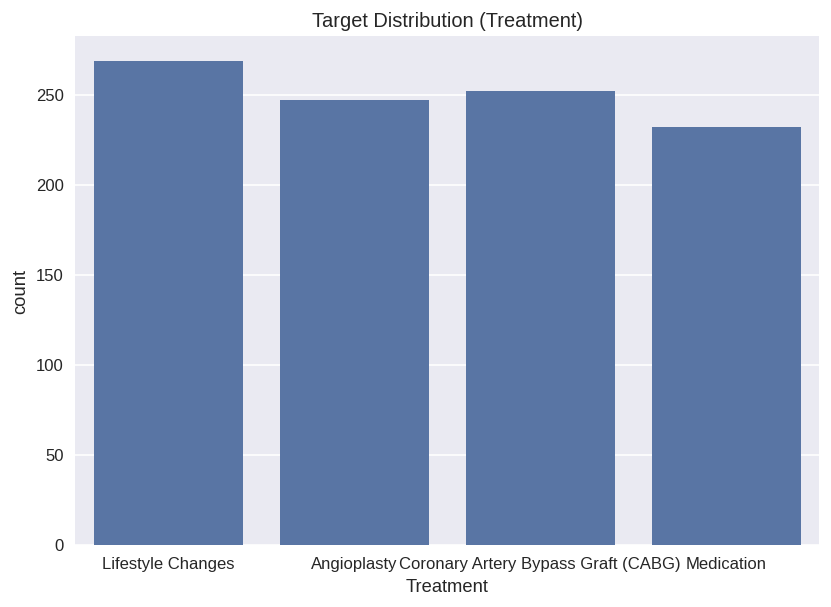

In [55]:
# =========================
# 5. Target distribution
# =========================
sns.countplot(x=target_col, data=df)
plt.title(f"Target Distribution ({target_col})")
plt.show()


In [56]:
# =========================
# 6. Univariate analysis
# =========================
# Age distribution
if "age" in df.columns:
    sns.histplot(df["age"], kde=True)
    plt.title("Age Distribution")
    plt.show()

# Sex distribution
if "sex" in df.columns:
    sns.countplot(x="sex", data=df)
    plt.title("Sex Distribution (0 = Female, 1 = Male)")
    plt.show()

# Chest pain type distribution
if "cp" in df.columns:
    sns.countplot(x="cp", data=df)
    plt.title("Chest Pain Type Distribution")
    plt.show()

In [57]:
# 7. Bivariate analysis (feature vs target)
# =========================
# Age vs Heart Disease
if "age" in df.columns:
    sns.boxplot(x=target_col, y="age", data=df)
    plt.title(f"Age vs {target_col}")
    plt.show()

# Sex vs Heart Disease
if "sex" in df.columns:
    sns.barplot(x="sex", y=target_col, data=df, ci=None)
    plt.title(f"Sex vs {target_col} Rate")
    plt.show()

# Chest Pain vs Heart Disease
if "cp" in df.columns:
    sns.barplot(x="cp", y=target_col, data=df, ci=None)
    plt.title(f"Chest Pain Type vs {target_col} Rate")
    plt.show()


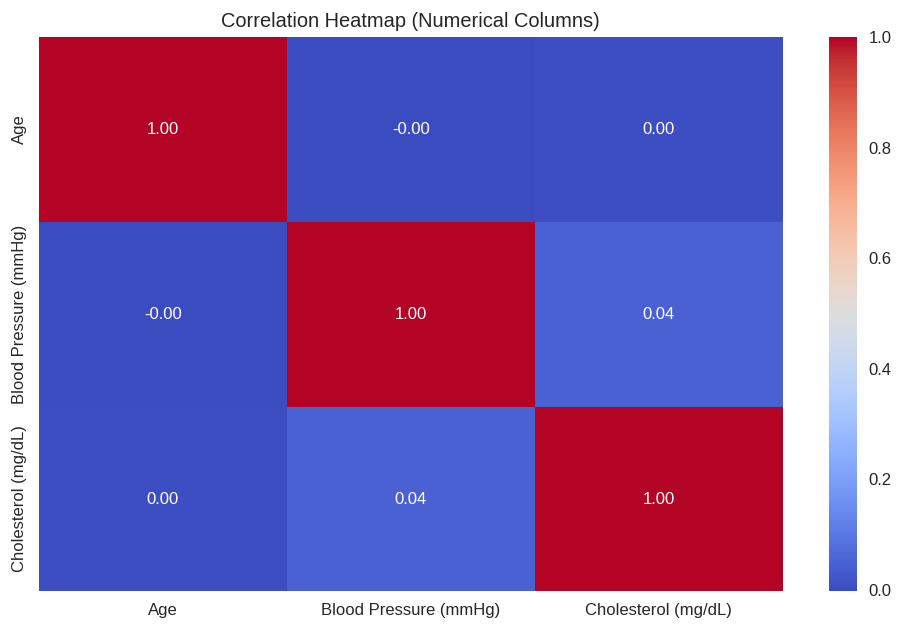

In [60]:
# =========================
# 8. Correlation heatmap
# =========================
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()